# Step 1: Setup Environment & Load Dataset

## Langkah 1.1: Install dan Load SQL Magic

In [4]:
%load_ext sql

## Langkah 1.2: Buat dan Sambungkan ke SQLite Database

In [7]:
%sql sqlite:///products.db

## Langkah 1.3: Load CSV ke Pandas lalu Simpan ke SQLite

In [10]:
import pandas as pd
import sqlite3

In [26]:
df = pd.read_csv("Downloads/BigBasket_Products.csv")

df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [14]:
# Pastikan nama kolom tidak ada spasi, jika iya ubah:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

### Koneksi ke SQLite dan simpan ke DB:

In [21]:
conn = sqlite3.connect("products.db")
df.to_sql("products", conn, if_exists="replace", index=False)

27555

## Langkah 1.4: Uji Koneksi SQL di Jupyter

In [24]:
%%sql
SELECT * FROM products LIMIT 5;

 * sqlite:///products.db
Done.


index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/"
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak."
4,Cereal Flip Lid Container/Storage Jar - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles.The Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time."
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/"


# Step 2: Exploratory Data Analysis (EDA)

## Langkah 2.1: Lihat 5 Data Teratas

In [30]:
%%sql
SELECT * FROM products LIMIT 5;

 * sqlite:///products.db
Done.


index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/"
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak."
4,Cereal Flip Lid Container/Storage Jar - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles.The Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time."
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/"


## Langkah 2.2: Cek Jumlah Baris Total

In [33]:
%%sql
SELECT COUNT(*) AS total_rows FROM products;

 * sqlite:///products.db
Done.


total_rows
27555


## Langkah 2.3: Cek Duplikat Berdasarkan Produk

In [62]:
%%sql
SELECT product, COUNT(*) AS count
FROM products
GROUP BY product
HAVING COUNT(*) > 1;

 * sqlite:///products.db
Done.


product,count


### 2.3.1: Hapus Duplikat Berdasarkan Nama Produk

In [65]:
%%sql
DELETE FROM products
WHERE rowid NOT IN (
    SELECT MIN(rowid)
    FROM products
    GROUP BY product
);

 * sqlite:///products.db
0 rows affected.


[]

## Langkah 2.4: Cek Nilai NULL / Kosong di Setiap Kolom

In [73]:
%%sql
SELECT 
    SUM(CASE WHEN product IS NULL OR TRIM(product) = '' THEN 1 ELSE 0 END) AS null_product,
    SUM(CASE WHEN category IS NULL OR TRIM(category) = '' THEN 1 ELSE 0 END) AS null_category,
    SUM(CASE WHEN sub_category IS NULL OR TRIM(sub_category) = '' THEN 1 ELSE 0 END) AS null_sub_category,
    SUM(CASE WHEN brand IS NULL OR TRIM(brand) = '' THEN 1 ELSE 0 END) AS null_brand,
    SUM(CASE WHEN sale_price IS NULL THEN 1 ELSE 0 END) AS null_sale_price,
    SUM(CASE WHEN market_price IS NULL THEN 1 ELSE 0 END) AS null_market_price,
    SUM(CASE WHEN rating IS NULL THEN 1 ELSE 0 END) AS null_rating
FROM products;

 * sqlite:///products.db
Done.


null_product,null_category,null_sub_category,null_brand,null_sale_price,null_market_price,null_rating
0,0,0,0,0,0,0


### 2.4.1: Hapus Baris dengan Kolom Penting yang Kosong

In [71]:
%%sql
DELETE FROM products
WHERE 
    product IS NULL OR TRIM(product) = '' OR
    category IS NULL OR TRIM(category) = '' OR
    sub_category IS NULL OR TRIM(sub_category) = '' OR
    brand IS NULL OR TRIM(brand) = '' OR
    sale_price IS NULL OR
    market_price IS NULL OR
    rating IS NULL;

 * sqlite:///products.db
7444 rows affected.


[]

## Langkah 2.5: Statistik Deskriptif Kolom Numerik

In [42]:
%%sql
SELECT 
    MIN(sale_price) AS min_sale_price,
    MAX(sale_price) AS max_sale_price,
    AVG(sale_price) AS avg_sale_price,
    MIN(market_price) AS min_market_price,
    MAX(market_price) AS max_market_price,
    AVG(market_price) AS avg_market_price,
    MIN(rating) AS min_rating,
    MAX(rating) AS max_rating,
    AVG(rating) AS avg_rating
FROM products;

 * sqlite:///products.db
Done.


min_sale_price,max_sale_price,avg_sale_price,min_market_price,max_market_price,avg_market_price,min_rating,max_rating,avg_rating
2.45,12500.0,322.51480783886655,3.0,12500.0,382.05666448920334,1.0,5.0,3.9434095831792573


## Langkah 2.6: Distribusi Produk per Kategori

In [45]:
%%sql
SELECT category, COUNT(*) AS total_products
FROM products
GROUP BY category
ORDER BY total_products DESC;

 * sqlite:///products.db
Done.


category,total_products
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610
Fruits & Vegetables,557


## Langkah 2.7: Top Brand Berdasarkan Jumlah Produk

In [48]:
%%sql
SELECT brand, COUNT(*) AS total_products
FROM products
GROUP BY brand
ORDER BY total_products DESC
LIMIT 10;

 * sqlite:///products.db
Done.


brand,total_products
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146
Himalaya,141
Dabur,138


## Langkah 2.8: Produk dengan Harga Paling Mahal & Termurah

In [51]:
%%sql
SELECT product, sale_price, market_price, brand
FROM products
ORDER BY sale_price DESC
LIMIT 5;

 * sqlite:///products.db
Done.


product,sale_price,market_price,brand
Bravura Clipper,12500.0,12500.0,Wahl
Pet Food - N&D Team Breeder Puppy Top Farmina,10090.0,10090.0,Farmina
Epilator SE9-9961 Legs-Body-Face,8184.44,10769.0,Braun
"Gas Stove-4 Burner Royale Plus Schott Glass, Black (40278)",7999.0,12245.0,Prestige
Extra Virgin Olive Oil,7299.0,7299.0,Abbies


# Step 3: Margin Calculation & Normalization

## Langkah 3.1: Tambahkan Kolom Margin

In [79]:
%%sql
ALTER TABLE products ADD COLUMN margin REAL;

 * sqlite:///products.db
Done.


[]

In [81]:
%%sql
UPDATE products
SET margin = market_price - sale_price;

 * sqlite:///products.db
16097 rows affected.


[]

### Lihat margin tertinggi

In [84]:
%%sql
SELECT product, brand, sale_price, market_price, margin
FROM products
ORDER BY margin DESC
LIMIT 5;

 * sqlite:///products.db
Done.


product,brand,sale_price,market_price,margin
"Induction Base Non Stick Cookware Set With Glass Lid - Bling, Blue",Nirlon,1399.0,4999.0,3600.0
Induction Base Non Stick Cookware Set With Glass Lid & Soft Touch Handle - Regal Purple,Nirlon,1499.0,4999.0,3500.0
"Dinner Set - Laser Etched, Premium Stainless Steel, Glory",Classic Essentials,2499.0,5999.0,3500.0
Olive Oil - Extra Light,BORGES,2280.0,5200.0,2920.0
Starter Dry Dog Food - Ultra Premium,Canine Creek,4050.0,6750.0,2700.0


## Langkah 3.2: Normalisasi Margin & Rating

### Langkah 3.2.1: Cek Min & Max Margin dan Rating

In [88]:
%%sql
SELECT 
    MIN(margin) AS min_margin, MAX(margin) AS max_margin,
    MIN(rating) AS min_rating, MAX(rating) AS max_rating
FROM products;

 * sqlite:///products.db
Done.


min_margin,max_margin,min_rating,max_rating
0.0,3600.0,1.0,5.0


### Langkah 3.2.2: Buat View dengan Normalisasi

In [91]:
%%sql
DROP VIEW IF EXISTS normalized_products;

CREATE VIEW normalized_products AS
SELECT *,
       -- Ganti angka di bawah dengan nilai aktual dari step sebelumnya
       (CAST(margin AS FLOAT) - 0.0) / (500.0 - 0.0) AS norm_margin,
       (CAST(rating AS FLOAT) - 1.0) / (5.0 - 1.0) AS norm_rating
FROM products;

 * sqlite:///products.db
Done.
Done.


[]

## Langkah 3.3: Lihat Produk dengan Normalisasi

In [94]:
%%sql
SELECT product, brand, sale_price, market_price, rating, margin, 
       ROUND(norm_margin, 3) AS norm_margin,
       ROUND(norm_rating, 3) AS norm_rating
FROM normalized_products
ORDER BY norm_margin DESC
LIMIT 10;

 * sqlite:///products.db
Done.


product,brand,sale_price,market_price,rating,margin,norm_margin,norm_rating
"Induction Base Non Stick Cookware Set With Glass Lid - Bling, Blue",Nirlon,1399.0,4999.0,3.1,3600.0,7.2,0.525
Induction Base Non Stick Cookware Set With Glass Lid & Soft Touch Handle - Regal Purple,Nirlon,1499.0,4999.0,3.2,3500.0,7.0,0.55
"Dinner Set - Laser Etched, Premium Stainless Steel, Glory",Classic Essentials,2499.0,5999.0,3.4,3500.0,7.0,0.6
Olive Oil - Extra Light,BORGES,2280.0,5200.0,4.4,2920.0,5.84,0.85
Starter Dry Dog Food - Ultra Premium,Canine Creek,4050.0,6750.0,3.0,2700.0,5.4,0.5
"Heavy Duty Ironing Board Cum Ladder - Grey, BB1437",DP,3419.0,5899.0,4.0,2480.0,4.96,0.75
Induction Base Non-Stick Cookware Set With Glass Lid - Blue,Nirlon,1549.0,3995.0,3.4,2446.0,4.892,0.6
"Stainless Steel Dinner Set - Apple Shape, Laser + Hammered",Kitchen Essentials,3999.0,6440.0,5.0,2441.0,4.882,1.0
Olive OilÂ - Pure,Disano,2999.08,5395.0,4.5,2395.92,4.792,0.875
Non-Stick Cookware Set With Glass Lid & Nylon Spoon-Granite Coating - Red,Nirlon,1149.0,3499.0,2.9,2350.0,4.7,0.475


# Step 4: Priority Score (Skor Prioritas Produk)

## Langkah 4.1: Buat View Dengan Skor Prioritas

In [98]:
%%sql
DROP VIEW IF EXISTS scored_products;

CREATE VIEW scored_products AS
SELECT *,
       ROUND((0.6 * norm_margin + 0.4 * norm_rating), 4) AS priority_score
FROM normalized_products;

 * sqlite:///products.db
Done.
Done.


[]

## Langkah 4.2: Tampilkan Top 10 Produk Prioritas

In [101]:
%%sql
SELECT product, brand, category, sale_price, market_price, rating, margin,
       ROUND(norm_margin, 3) AS norm_margin,
       ROUND(norm_rating, 3) AS norm_rating,
       ROUND(priority_score, 3) AS score
FROM scored_products
ORDER BY priority_score DESC
LIMIT 10;

 * sqlite:///products.db
Done.


product,brand,category,sale_price,market_price,rating,margin,norm_margin,norm_rating,score
"Induction Base Non Stick Cookware Set With Glass Lid - Bling, Blue",Nirlon,"Kitchen, Garden & Pets",1399.0,4999.0,3.1,3600.0,7.2,0.525,4.53
"Dinner Set - Laser Etched, Premium Stainless Steel, Glory",Classic Essentials,"Kitchen, Garden & Pets",2499.0,5999.0,3.4,3500.0,7.0,0.6,4.44
Induction Base Non Stick Cookware Set With Glass Lid & Soft Touch Handle - Regal Purple,Nirlon,"Kitchen, Garden & Pets",1499.0,4999.0,3.2,3500.0,7.0,0.55,4.42
Olive Oil - Extra Light,BORGES,Gourmet & World Food,2280.0,5200.0,4.4,2920.0,5.84,0.85,3.844
Starter Dry Dog Food - Ultra Premium,Canine Creek,"Kitchen, Garden & Pets",4050.0,6750.0,3.0,2700.0,5.4,0.5,3.44
"Stainless Steel Dinner Set - Apple Shape, Laser + Hammered",Kitchen Essentials,"Kitchen, Garden & Pets",3999.0,6440.0,5.0,2441.0,4.882,1.0,3.329
"Heavy Duty Ironing Board Cum Ladder - Grey, BB1437",DP,"Kitchen, Garden & Pets",3419.0,5899.0,4.0,2480.0,4.96,0.75,3.276
Olive OilÂ - Pure,Disano,Gourmet & World Food,2999.08,5395.0,4.5,2395.92,4.792,0.875,3.225
Induction Base Non-Stick Cookware Set With Glass Lid - Blue,Nirlon,"Kitchen, Garden & Pets",1549.0,3995.0,3.4,2446.0,4.892,0.6,3.175
Non-Stick Cookware Set With Glass Lid & Nylon Spoon-Granite Coating - Red,Nirlon,"Kitchen, Garden & Pets",1149.0,3499.0,2.9,2350.0,4.7,0.475,3.01


## Langkah 4.3: Distribusi Skor per Kategori (opsional)

In [104]:
%%sql
SELECT category,
       COUNT(*) AS total_products,
       ROUND(AVG(priority_score), 3) AS avg_priority_score
FROM scored_products
GROUP BY category
ORDER BY avg_priority_score DESC;

 * sqlite:///products.db
Done.


category,total_products,avg_priority_score
"Kitchen, Garden & Pets",2265,0.469
Baby Care,438,0.38
Beauty & Hygiene,4667,0.372
Beverages,513,0.345
Cleaning & Household,1901,0.335
"Foodgrains, Oil & Masala",1608,0.329
Gourmet & World Food,2040,0.32
Snacks & Branded Foods,2098,0.308
"Bakery, Cakes & Dairy",567,0.304


# Step 5: Analisis Brand, Kategori & Kuadran Visualisasi

## Langkah 5.1: Rata-Rata Skor per Brand dan Kategori

### Rata-Rata per Brand

In [111]:
%%sql
SELECT brand,
       COUNT(*) AS total_products,
       ROUND(AVG(priority_score), 3) AS avg_priority_score,
       ROUND(AVG(margin), 2) AS avg_margin,
       ROUND(AVG(rating), 2) AS avg_rating
FROM scored_products
GROUP BY brand
HAVING total_products >= 3  -- filter out outlier brand kecil
ORDER BY avg_priority_score DESC
LIMIT 10;

 * sqlite:///products.db
Done.


brand,total_products,avg_priority_score,avg_margin,avg_rating
Jaguar,6,2.029,1504.5,3.23
Canine Creek,3,1.749,1263.33,3.33
Classic Essentials,5,1.706,1228.0,3.32
Savera,3,1.689,1246.0,2.93
Nirlon,17,1.499,1042.12,3.48
Nova,21,1.443,1056.97,2.75
Lexton,8,1.368,950.75,3.28
Triones,4,1.355,981.0,2.78
Guess,5,1.339,874.2,3.9
Police,10,1.162,802.03,3.0


### Rata-Rata per Category

In [114]:
%%sql
SELECT category,
       COUNT(*) AS total_products,
       ROUND(AVG(priority_score), 3) AS avg_priority_score
FROM scored_products
GROUP BY category
ORDER BY avg_priority_score DESC;

 * sqlite:///products.db
Done.


category,total_products,avg_priority_score
"Kitchen, Garden & Pets",2265,0.469
Baby Care,438,0.38
Beauty & Hygiene,4667,0.372
Beverages,513,0.345
Cleaning & Household,1901,0.335
"Foodgrains, Oil & Masala",1608,0.329
Gourmet & World Food,2040,0.32
Snacks & Branded Foods,2098,0.308
"Bakery, Cakes & Dairy",567,0.304


## Langkah 5.2: Identifikasi Produk Berdasarkan Kuadran

### Dapatkan Rata-Rata Rating dan Margin (Untuk Batas Kuadran)

In [118]:
%%sql
SELECT ROUND(AVG(rating), 2) AS avg_rating,
       ROUND(AVG(margin), 2) AS avg_margin
FROM scored_products;

 * sqlite:///products.db
Done.


avg_rating,avg_margin
3.93,54.82


### Buat Pandas DataFrame dari SQL untuk Visualisasi

In [121]:
# Ambil data margin vs rating
df_quad = %sql SELECT product, rating, margin, brand, category FROM scored_products
df_quad = df_quad.DataFrame()

# Tetapkan nilai tengah kuadran (ubah sesuai hasil query di atas)
avg_rating = 3.8
avg_margin = 30

 * sqlite:///products.db
Done.


### Labelkan Kuadran di Python

In [124]:
def kuadran(row):
    if row['rating'] >= avg_rating and row['margin'] >= avg_margin:
        return 'I: High Rating & High Margin'
    elif row['rating'] >= avg_rating and row['margin'] < avg_margin:
        return 'II: High Rating & Low Margin'
    elif row['rating'] < avg_rating and row['margin'] < avg_margin:
        return 'III: Low Rating & Low Margin'
    else:
        return 'IV: Low Rating & High Margin'

df_quad['kuadran'] = df_quad.apply(kuadran, axis=1)

### Visualisasi Scatter Plot Kuadran

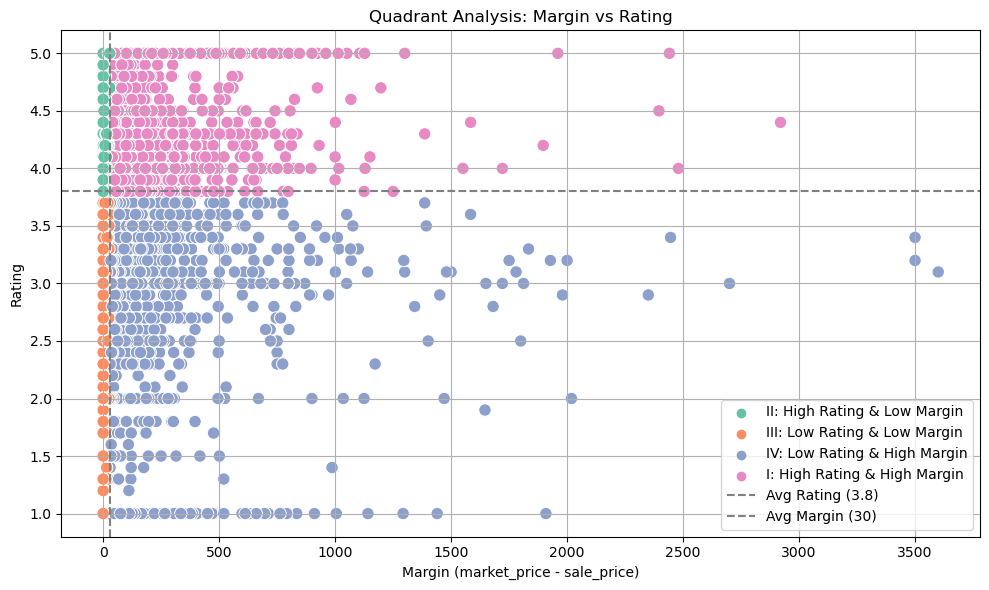

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_quad, x='margin', y='rating', hue='kuadran', palette='Set2', s=80)

# Tambahkan garis rata-rata
plt.axhline(avg_rating, color='gray', linestyle='--', label=f'Avg Rating ({avg_rating})')
plt.axvline(avg_margin, color='gray', linestyle='--', label=f'Avg Margin ({avg_margin})')

plt.title('Quadrant Analysis: Margin vs Rating')
plt.xlabel('Margin (market_price - sale_price)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Visualisasi Lanjutan dan Ringkasan Skor

## Langkah 6.1: Top 10 Produk Berdasarkan Priority Score

 * sqlite:///products.db
Done.


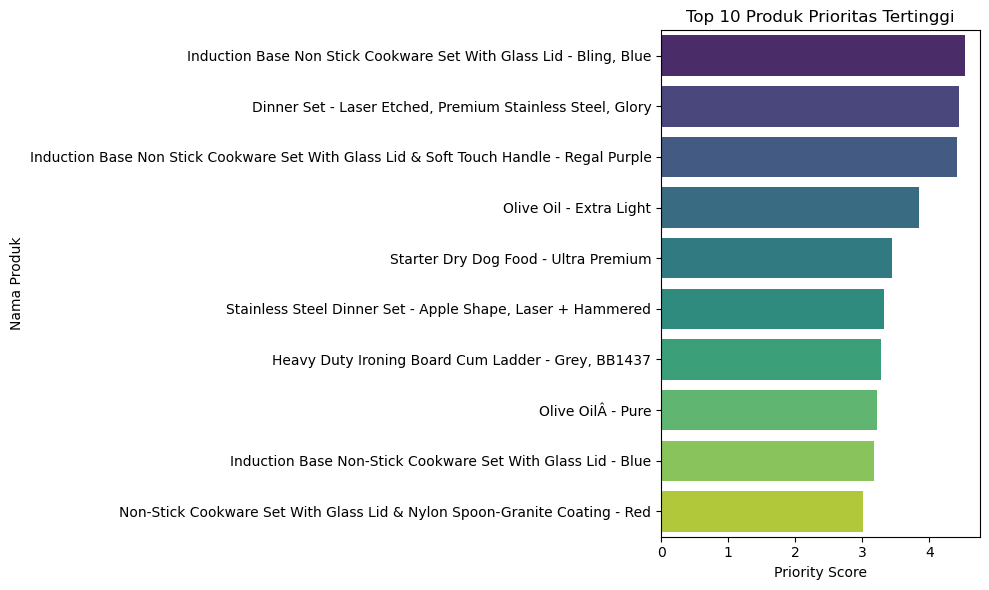

In [131]:
df_top10 = %sql SELECT product, brand, category, sale_price, market_price, rating, margin, ROUND(priority_score, 3) as score FROM scored_products ORDER BY priority_score DESC LIMIT 10
df_top10 = df_top10.DataFrame()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=df_top10, x='score', y='product', palette='viridis')
plt.title('Top 10 Produk Prioritas Tertinggi')
plt.xlabel('Priority Score')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()

## Langkah 6.2: Pie Chart Komposisi Kategori pada Top 20 Produk

 * sqlite:///products.db
Done.


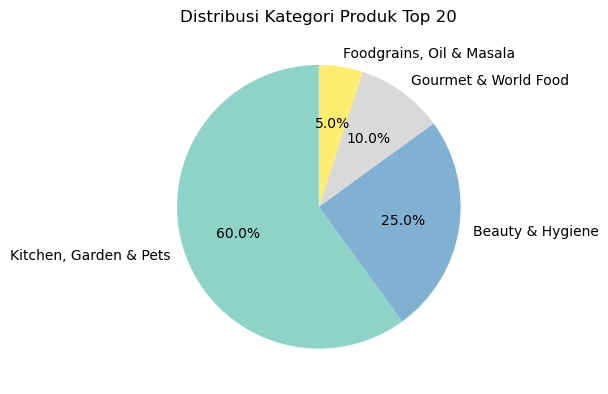

In [134]:
df_top20 = %sql SELECT category FROM scored_products ORDER BY priority_score DESC LIMIT 20
df_top20 = df_top20.DataFrame()

plt.figure(figsize=(6,6))
df_top20['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribusi Kategori Produk Top 20')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Langkah 6.3: Heatmap Korelasi

 * sqlite:///products.db
Done.


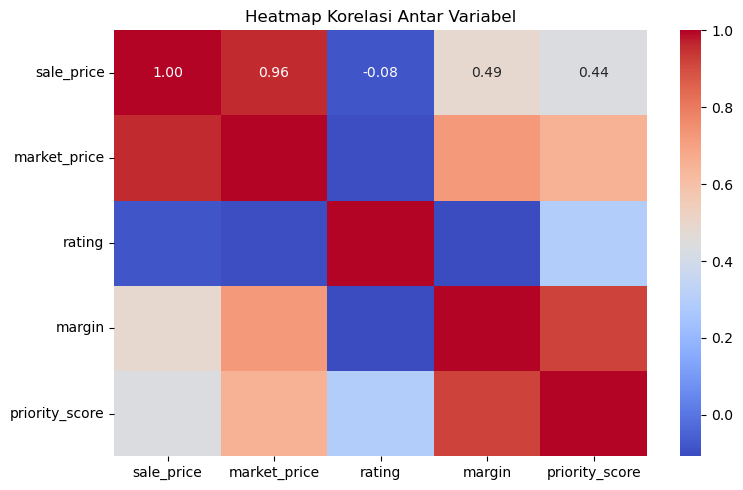

In [137]:
df_corr = %sql SELECT sale_price, market_price, rating, margin, priority_score FROM scored_products
df_corr = df_corr.DataFrame()

plt.figure(figsize=(8,5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()